### Question 7 - Run NN


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Load the dataset
df = pd.read_csv("WineQT.csv")

# Step 2: Drop the 'Id' column (not needed)
df.drop(columns=["Id"], inplace=True)

# Step 3: Separate features (X) and target (y)
X = df.drop(columns=["quality"])  # Features
y = df["quality"]  # Target variable (discrete classes)

# Step 4: Map target labels to a range of [0, num_classes - 1]
# Find the unique classes in the target variable
unique_classes = y.unique()
num_classes = len(unique_classes)

# Create a mapping from the original labels to the new range
label_mapping = {label: idx for idx, label in enumerate(sorted(unique_classes))}

# Apply the mapping to the target variable
y_mapped = y.map(label_mapping)

# Step 5: Perform Z-score normalization (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 6: Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_mapped, test_size=0.2, random_state=42)

# Step 7: Train a Decision Tree Classifier (baseline model)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Build and train a Neural Network
# Step 8.1: Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(num_classes, activation='softmax')  # Output layer (num_classes)
])

# Step 8.2: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 8.3: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 8.4: Make predictions on the test set
y_pred_nn = model.predict(X_test)
y_pred_nn = tf.argmax(y_pred_nn, axis=1)  # Convert probabilities to class labels

# Step 8.5: Evaluate the neural network
print("\nNeural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nNeural Network Classification Report:\n", classification_report(y_test, y_pred_nn))
print("\nNeural Network Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# Step 9: Compare results
print("\nComparison of Results:")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))

print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred))
print("\nNeural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nNeural Network Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Decision Tree Accuracy: 0.5283842794759825

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.14      0.17      0.15         6
           2       0.64      0.58      0.61        96
           3       0.52      0.52      0.52        99
           4       0.42      0.50      0.46        26
           5       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.29      0.29      0.29       229
weighted avg       0.54      0.53      0.53       229


Decision Tree Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 0  1  2  2  1  0]
 [ 3  4 56 31  2  0]
 [ 2  2 30 51 14  0]
 [ 0  0  0 13 13  0]
 [ 0  0  0  1  1  0]]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklea

Epoch 1/50
23/23 [==============================] - 1s 20ms/step - loss: 1.6828 - accuracy: 0.2969 - val_loss: 1.5258 - val_accuracy: 0.5464
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 1.4174 - accuracy: 0.4733 - val_loss: 1.3027 - val_accuracy: 0.5738
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 1.2227 - accuracy: 0.5335 - val_loss: 1.1757 - val_accuracy: 0.5956
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 1.1062 - accuracy: 0.5869 - val_loss: 1.0969 - val_accuracy: 0.6011
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 1.0472 - accuracy: 0.6033 - val_loss: 1.0661 - val_accuracy: 0.5683
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 1.0087 - accuracy: 0.6005 - val_loss: 1.0392 - val_accuracy: 0.5847
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.9818 - accuracy: 0.6156 - val_loss: 1.0271 - val_accuracy: 0.5902
Epoch 8/50
23/23 [=

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklea

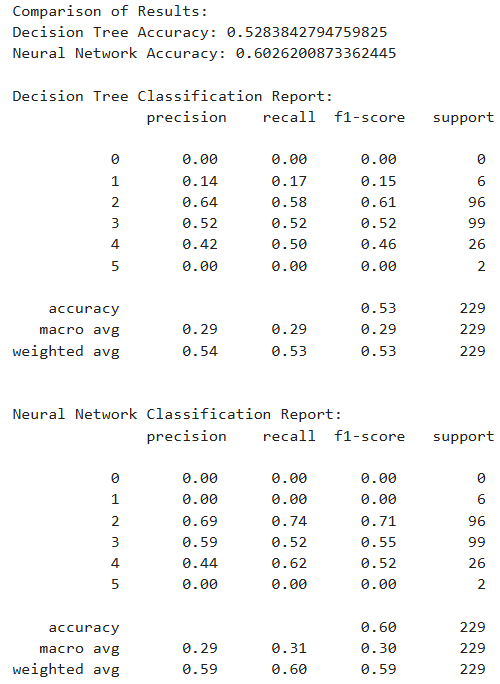

### Question 8 - Model Comparison

The Neural Network (NN) outperforms the Decision Tree (DT) in predicting wine quality, achieving an accuracy of 60.26% compared to the DT's 52.84%. The NN shows better precision, recall, and F1-scores for most classes, particularly for wines of quality 5 and 6, which are the most common in the dataset. For example, the NN achieves a 74% recall for quality 5, compared to the DT's 58%. However, both models struggle with minority classes (e.g., quality 4 and 7), indicating room for improvement through techniques like oversampling or class weighting. Overall, the NN demonstrates superior performance, making it a more effective choice for this classification task.